<a href="https://colab.research.google.com/github/awright101/learning-tutorials-etc/blob/main/City_Data_Science_Society_NaturalLanguageProcessing_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speech Recognition with AI
Brought to you by Daniel Sikar - daniel.sikar@city.ac.uk
and
City Data Science Society - https://www.datasciencesociety.city/

## Natural Language Processing with Convolutional Neural Networks

Notebook: https://github.com/dsikar/natural-language-processing/blob/master/NaturalLanguageProcessing.ipynb

Tensorflow's Speech Commands Datasets: http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz

Consisting of:
* 65,000 one-second long utterances
* 30 short words plus a background noise set
* Thousands of different people

Using a subset ("yes" and "no") of Tensorflow's Speech Commands Datasets. The full set consists of 30 words plus a background noise set: _background_noise_, bed, bird, cat, dog, down, eight, five, four, go, happy, house, left, marvin, no, nine, off, on, one, right, seven, sheila, six, stop, three, tree, two, up, wow, yes, zero.

Note: In this workshop, we will **not** use the full dataset.

# 1. Getting to know the environment

In [2]:
# How much space have we got?
!df -h
# Command help
# !man df
# What is on the filesystem?
#!ls
# Where are we?
# !pwd
# What files are on the top level / ?
!ls /

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   39G   30G  57% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
tmpfs           6.4G   24K  6.4G   1% /var/colab
/dev/sda1        75G   40G   35G  54% /opt/bin
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
bin	 datalab  home	 lib64	opt   run   sys		       tools
boot	 dev	  lib	 media	proc  sbin  tensorflow-1.15.2  usr
content  etc	  lib32  mnt	root  srv   tmp		       var


# 2. Get the data

In [3]:
!wget http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz
# !ls
!mkdir full_dataset
# !ls
!tar xvf speech_commands_v0.01.tar.gz -C full_dataset/ 
# !ls full_dataset
!mkdir dataset
!mv full_dataset/yes dataset/
!mv full_dataset/no dataset/

Streaming output truncated to the last 5000 lines.
./up/6f9088d7_nohash_0.wav
./up/6f342826_nohash_0.wav
./up/e0a7c5a0_nohash_0.wav
./up/4d4e17f5_nohash_1.wav
./up/b0f24c9b_nohash_0.wav
./up/735845ab_nohash_2.wav
./up/53d5b86f_nohash_0.wav
./up/1a5b9ca4_nohash_1.wav
./up/23abe1c9_nohash_2.wav
./up/bdee441c_nohash_1.wav
./up/a1cff772_nohash_1.wav
./up/1ecfb537_nohash_3.wav
./up/37fc5d97_nohash_3.wav
./up/bd8412df_nohash_1.wav
./up/e53139ad_nohash_1.wav
./up/10ace7eb_nohash_3.wav
./up/30065f33_nohash_0.wav
./up/eefd26f3_nohash_0.wav
./up/c9b653a0_nohash_2.wav
./up/02746d24_nohash_0.wav
./up/e1469561_nohash_0.wav
./up/4bba14ce_nohash_0.wav
./up/b5d1e505_nohash_1.wav
./up/531a5b8a_nohash_1.wav
./up/0135f3f2_nohash_0.wav
./up/dbb40d24_nohash_4.wav
./up/e9287461_nohash_1.wav
./up/71e6ab20_nohash_0.wav
./up/ead2934a_nohash_1.wav
./up/f9af0887_nohash_0.wav
./up/ff63ab0b_nohash_0.wav
./up/f3d06008_nohash_0.wav
./up/918a2473_nohash_4.wav
./up/e54a0f16_nohash_0.wav
./up/cb8f8307_nohash_1.wav
./up

In [4]:
!ls dataset/yes | wc -l
!ls dataset/no | wc -l
!ls dataset
# !ls dataset/yes


2377
2375
no  yes


# 3. Import modules

In [5]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")

# 4. Visualise data

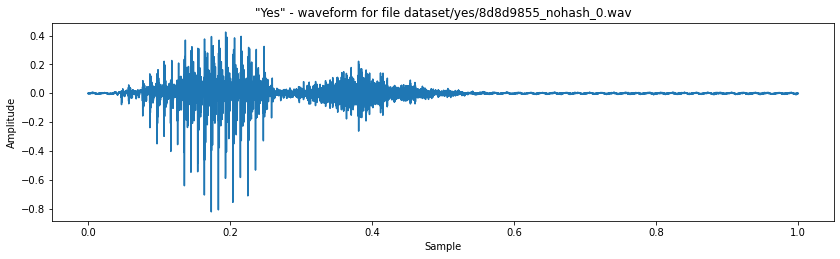

In [6]:
# Dataset original sample rate 16 kHz
# Humans can detect sounds in a frequency range from about 20 Hz to 20 kHz.
# We will convert data to 8 kHz given our network architecture (more later)

#Librosa reads .wav files

samples_yes, sample_rate = librosa.load('dataset/yes/8d8d9855_nohash_0.wav', sr = 8000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('"Yes" - waveform for file ' + 'dataset/yes/8d8d9855_nohash_0.wav')
ax1.set_xlabel('Sample')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples_yes), sample_rate), samples_yes)
ipd.Audio(samples_yes, rate=sample_rate)

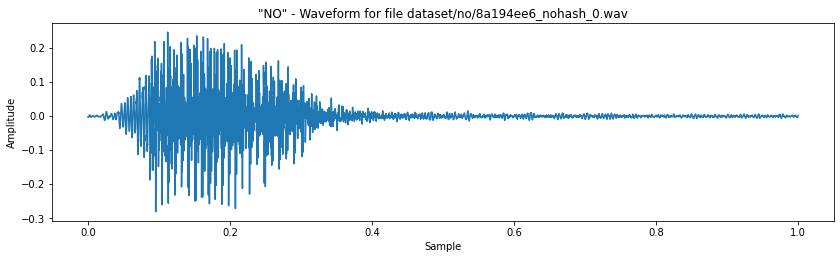

In [7]:
samples_no, sample_rate = librosa.load('dataset/no/8a194ee6_nohash_0.wav', sr = 8000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('"NO" - Waveform for file ' + 'dataset/no/8a194ee6_nohash_0.wav')
ax1.set_xlabel('Sample')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples_no), sample_rate), samples_no)
ipd.Audio(samples_no, rate=sample_rate)

In [8]:
# Data type
print(type(samples_no))
# Size
print(samples_no.shape)

<class 'numpy.ndarray'>
(8000,)


In [9]:
# Statistical analysis - can the word be inferred?
print("No, sample mean:", np.mean(samples_no))
print("No, sample std:", np.std(samples_no))
print("Yes, sample mean:", np.mean(samples_yes))
print("Yes, sample std:", np.std(samples_yes))

No, sample mean: 6.006135e-05
No, sample std: 0.039729252
Yes, sample mean: -9.110551e-05
Yes, sample std: 0.056270927


In [10]:
# Labels
train_audio_path = "dataset"
labels=os.listdir(train_audio_path)
print("Audio labels: ", labels)

Audio labels:  ['yes', 'no']


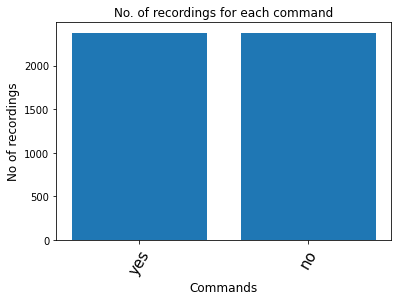

In [11]:
# Find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure()
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

(array([8.000e+00, 3.000e+00, 1.200e+01, 2.200e+01, 4.900e+01, 4.000e+01,
        8.400e+01, 6.400e+01, 1.230e+02, 4.347e+03]),
 array([0.4644375 , 0.51799375, 0.57155   , 0.62510625, 0.6786625 ,
        0.73221875, 0.785775  , 0.83933125, 0.8928875 , 0.94644375,
        1.        ]),
 <a list of 10 Patch objects>)

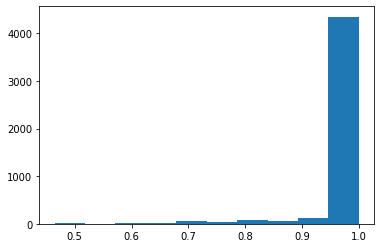

In [12]:
# Duration
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

# 5. Preprocess data

In [13]:
train_audio_path = 'dataset'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        # resample
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 8000)
        if(len(samples)== 8000) : 
            # only use 1 second long recordings
            all_wave.append(samples)
            all_label.append(label)

yes
no


In [14]:
# print size of training dataset
print(len(all_wave))

4255


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
arr_labels=le.fit_transform(all_label)
classes= list(le.classes_)
# print datatype
print(type(classes))
# print classes
print(classes)

<class 'list'>
['no', 'yes']


In [16]:
from keras.utils import np_utils
arr_labels=np_utils.to_categorical(arr_labels, num_classes=len(labels))

In [17]:
# type
print(type(arr_labels))
# shape
print(arr_labels.shape)
# first first index value
print(arr_labels[0]) # yes
# first last index value
print(arr_labels[arr_labels.shape[0]-1]) # yes

<class 'numpy.ndarray'>
(4255, 2)
[0. 1.]
[1. 0.]


labels:  [0. 1.]


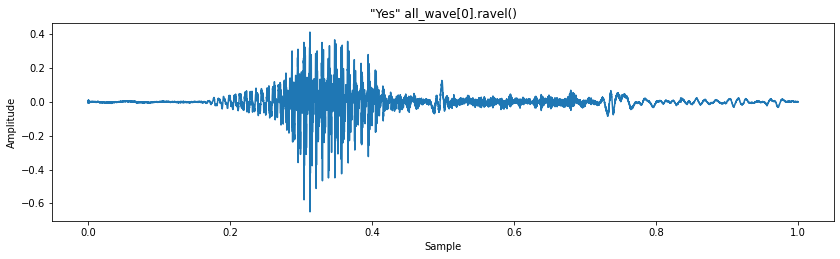

In [18]:
# Let's look at data again, this time loading from array
samples_no = all_wave[0].ravel()
sample_rate = 8000
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('"Yes" all_wave[0].ravel()')
ax1.set_xlabel('Sample')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples_no), sample_rate), samples_no)
print("labels: ", arr_labels[0])
ipd.Audio(samples_no, rate=sample_rate)



labels:  [1. 0.]


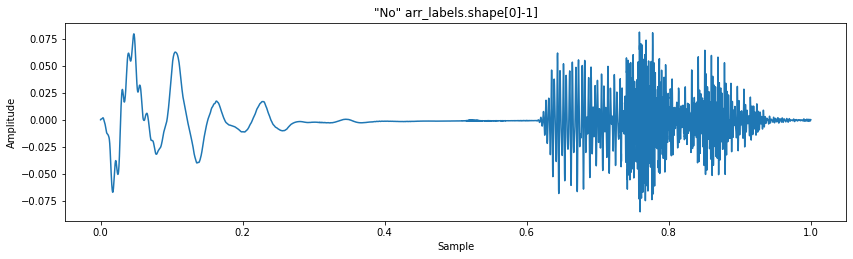

In [19]:
print()
samples_no = all_wave[arr_labels.shape[0]-1].ravel()
sample_rate = 8000
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('"No" arr_labels.shape[0]-1]')
ax1.set_xlabel('Sample')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples_no), sample_rate), samples_no)
print("labels: ", arr_labels[arr_labels.shape[0]-1])
ipd.Audio(samples_no, rate=sample_rate)

In [20]:
# Reshape the 1D array to 2D since the input to the conv1d must be a 2D array
all_wave = np.array(all_wave).reshape(-1,8000,1)

# 6. Split data

In [21]:
# Split into training and validation sets 70/30
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(arr_labels),stratify=arr_labels,test_size = 0.3,random_state=777,shuffle=True)

# 7. Create model

In [22]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

In [23]:
# Compile, defining a loss function, optimiser and metrics
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
# Set early stopping and check pointing
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=0.0001) 
mc = ModelCheckpoint('nlp-model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# 8. Train model

In [26]:
# Fit the model (find best parameters)
history=model.fit(x_tr, y_tr ,epochs=10, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val),verbose=True)

Epoch 1/10
94/94 [==============================] - 1s 13ms/step - loss: 0.6381 - accuracy: 0.6561 - val_loss: 0.5992 - val_accuracy: 0.7009
Epoch 2/10
94/94 [==============================] - 1s 9ms/step - loss: 0.5257 - accuracy: 0.7754 - val_loss: 0.5065 - val_accuracy: 0.7768
Epoch 3/10
94/94 [==============================] - 1s 9ms/step - loss: 0.4258 - accuracy: 0.8240 - val_loss: 0.3842 - val_accuracy: 0.8301
Epoch 4/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3755 - accuracy: 0.8539 - val_loss: 0.3742 - val_accuracy: 0.8489
Epoch 5/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3439 - accuracy: 0.8573 - val_loss: 0.3055 - val_accuracy: 0.8825
Epoch 6/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3225 - accuracy: 0.8741 - val_loss: 0.2807 - val_accuracy: 0.8927
Epoch 7/10
94/94 [==============================] - 1s 9ms/step - loss: 0.2771 - accuracy: 0.8842 - val_loss: 0.2752 - val_accuracy: 0.8966
Epoch 8/10
94/94 [=

In [27]:
# save model
model.save('nlp-model.h5')

In [28]:
# verify 
!ls -lh nlp-model.h5

-rw-r--r-- 1 root root 19M Mar 15 14:52 nlp-model.h5


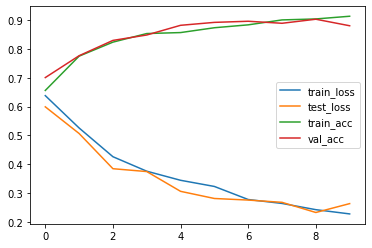

In [29]:
# Plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
pyplot.legend()
pyplot.show()

In [30]:
# Load model
from keras.models import load_model
model=load_model('nlp-model.h5')

# 9. Predict

In [31]:
def predict(audio):
    """
    Input
      audio: array representing audio file
    Ouput
      prob: 
      classes:
    """
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return prob, classes[index]

Random index selected: 421
Randomly selected audio: no
Prediction output:  [[9.999192e-01 8.080111e-05]]
Predicted class: no


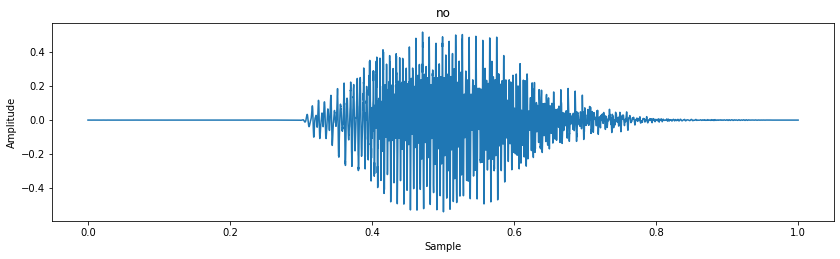

In [32]:
import random
# print("Number of testing examples - len(x_val):", len(x_val))
index=random.randint(0,len(x_val)-1)
print("Random index selected:", index)
samples=x_val[index].ravel() # x_val[index] shape: (8000, 1), "samples" shape: (8000,)
print("Randomly selected audio:",classes[np.argmax(y_val[index])])
pred, predClass = predict(samples)
print("Prediction output: ", pred)
print("Predicted class:", predClass)
sample_rate = 8000
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title(predClass)
ax1.set_xlabel('Sample')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)
ipd.Audio(samples, rate=8000)

# 10. Practical Applications

In [33]:
# TODO Audio capture
# TODO Audio preprocessing
if(predClass == "yes"):
  # TODO hardware 
  print("Doors opening")
else:
  # TODO hardware 
  print("Doors closing")

Doors closing


# 11. Downloading the model

In [34]:
from google.colab import files
files.download('nlp-model.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 12. Practical considerations - software versions

In [ ]:
# When running the model on other machines, software versions should at least match,
# not be lower than on machine where model was trained

import keras
!python --version
print("TensorFlow version:", tensorflow.__version__)
print("Keras version:", keras.__version__)